## Install Libraries

In [2]:
!pip3 install -r requirements_current.txt

  Using cached appnope-0.1.4-py2.py3-none-any.whl (4.3 kB)
  Using cached asttokens-2.4.1-py2.py3-none-any.whl (27 kB)
  Using cached cloudpickle-3.0.0-py3-none-any.whl (20 kB)
  Using cached comm-0.2.2-py3-none-any.whl (7.2 kB)
  Using cached contourpy-1.2.0-cp39-cp39-win_amd64.whl (181 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached debugpy-1.6.7-cp39-cp39-win_amd64.whl (4.8 MB)
  Using cached executing-2.0.1-py2.py3-none-any.whl (24 kB)
  Using cached fonttools-4.50.0-cp39-cp39-win_amd64.whl (2.2 MB)
  Using cached imageio-2.34.0-py3-none-any.whl (313 kB)
  Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)
  Using cached importlib_resources-6.4.0-py3-none-any.whl (38 kB)
  Using cached ipykernel-6.29.3-py3-none-any.whl (117 kB)
  Using cached ipython-8.12.0-py3-none-any.whl (796 kB)
  Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Using cached jupyter_core-5.5.0-py3-none-any.whl (28 kB)
  Using cached kiwisolver-1.4.5-cp39-cp39-win_am

ERROR: To modify pip, please run the following command:
C:\Users\Loo Guan Yee\anaconda3\python.exe -m pip install -r requirements_current.txt


In [2]:
# Generate requirements_current.txt
# ! pip list --format=freeze > requirements_current.txt

# Import Libraries

In [3]:
import importlib

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [136]:
import models
import parameters
import preprocessing

In [137]:
importlib.reload(models)
importlib.reload(parameters)
importlib.reload(preprocessing)

<module 'preprocessing' from 'c:\\Users\\Loo Guan Yee\\OneDrive - National University of Singapore\\NUS\\2023 2024 Sem 2\\DSA4263\\DSA4263-Project\\preprocessing.py'>

# Import Dataset

In [42]:
df = pd.read_csv("Data/Raw/insurance_claims.csv")

# EDA Insight

# Random Forest New

In [15]:
import json
from sklearn.ensemble import RandomForestClassifier

# NOT ACTUAL PARAMS
tuned_params = {
    "n_estimators": 100,
    "max_depth": 10,
    "min_samples_split": 2,
    "min_samples_leaf": 1,
    "max_features": "auto",
    "bootstrap": True
}

In [16]:
X_train_non_normalized, X_test_non_normalized, y_train_non_normalized, y_test_non_normalized = preprocessing.preprocess_pipeline(df, encoding=True, normalization=False)
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = preprocessing.preprocess_pipeline(df, encoding=True, normalization=True)

In [17]:
rf_model = models.IndividualModel(
    model_func = RandomForestClassifier,
    param_info = parameters.RANDOM_FOREST_INFORMATION,
    X_train = X_train_non_normalized,
    X_test = X_test_non_normalized,
    y_train = y_train_non_normalized,
    y_test = y_test_non_normalized
    )

## Results without Tuning

In [18]:
rf_model.train()
rf_model.predict()

In [19]:
# No Tuning is already decent, with bad recall though
rf_model.evaluate()

{'accuracy': 0.805,
 'precision': 0.6136363636363636,
 'recall': 0.5510204081632653,
 'f1_score': 0.5806451612903225}

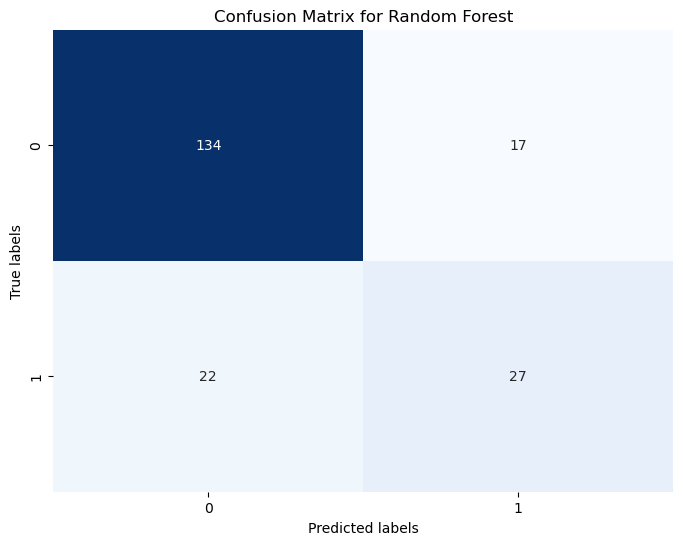

In [20]:
cm_rf_base = rf_model.plot_confusion_matrix()

## Results with Tuning

In [22]:
rf_model.finetune()

[I 2024-04-07 01:04:39,843] A new study created in memory with name: no-name-28a59d12-045c-40bb-abf7-11c5545b17fd
[I 2024-04-07 01:04:41,573] Trial 0 finished with value: 0.37881918199378517 and parameters: {'n_estimators': 1, 'max_depth': 8, 'criterion': 'entropy'}. Best is trial 0 with value: 0.37881918199378517.
[I 2024-04-07 01:04:43,278] Trial 1 finished with value: 0.39553922135157826 and parameters: {'n_estimators': 4, 'max_depth': 1, 'criterion': 'entropy'}. Best is trial 1 with value: 0.39553922135157826.
[W 2024-04-07 01:04:43,844] Trial 2 failed with parameters: {'n_estimators': 15, 'max_depth': 2, 'criterion': 'log_loss'} because of the following error: KeyError('log_loss').
Traceback (most recent call last):
  File "c:\Users\Loo Guan Yee\anaconda3\lib\site-packages\optuna\study\_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "c:\Users\Loo Guan Yee\OneDrive - National University of Singapore\NUS\2023 2024 Sem 2\DSA4263\DSA4263-Project\models.

KeyError: 'log_loss'

In [15]:
rf_model.train()
rf_model.predict()

rf_model.evaluate()

{'accuracy': 0.815,
 'precision': 0.6,
 'recall': 0.7346938775510204,
 'f1_score': 0.6605504587155964}

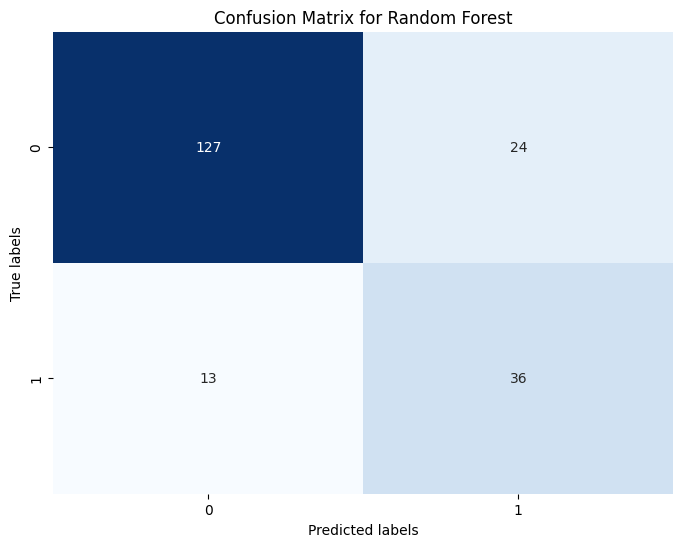

In [16]:
cm_rf_tuned = rf_model.plot_confusion_matrix()

## Model Explanation

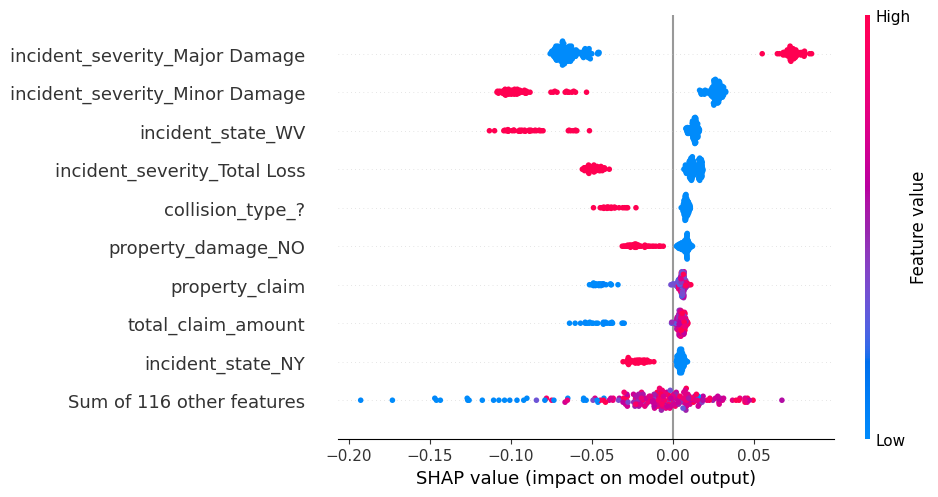

In [17]:
rf_model.shap_explanation(is_tree=True, class_to_observe=1)

# Decision Tree

In [120]:
import json
from sklearn.tree import DecisionTreeClassifier

# NOT ACTUAL PARAMS
tuned_params = {
    "max_depth": 10,
    "min_samples_split": 2,
    "min_samples_leaf": 2
}

In [121]:
X_train_non_normalized, X_test_non_normalized, y_train_non_normalized, y_test_non_normalized = preprocessing.preprocess_pipeline(df, encoding=True, normalization=False)
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = preprocessing.preprocess_pipeline(df, encoding=True, normalization=True)

In [139]:
dt_model = models.IndividualModel(
    model_func = DecisionTreeClassifier,
    param_info = parameters.DECISION_TREE_INFORMATION,
    X_train = X_train_non_normalized,
    X_test = X_test_non_normalized,
    y_train = y_train_non_normalized,
    y_test = y_test_non_normalized
    )

## Results without Tuning

In [140]:
dt_model.train()
dt_model.predict()

In [141]:
# No Tuning is already decent, with bad recall though
dt_model.evaluate()

{'accuracy': 0.745,
 'precision': 0.48214285714285715,
 'recall': 0.5510204081632653,
 'f1_score': 0.5142857142857142}

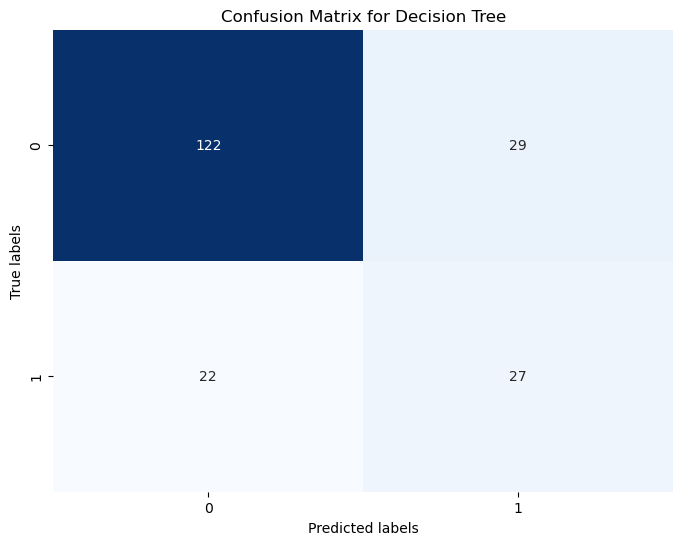

In [142]:
cm_dt_base = dt_model.plot_confusion_matrix()

## Results with Tuning

In [126]:
dt_model.finetune()

[I 2024-04-07 03:14:52,436] A new study created in memory with name: no-name-6d589dff-52eb-49e2-b6c0-aca20becab76
[I 2024-04-07 03:14:54,182] Trial 0 finished with value: 0.6288224072741396 and parameters: {'max_depth': 1, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.6288224072741396.
[I 2024-04-07 03:14:56,020] Trial 1 finished with value: 0.653979353979354 and parameters: {'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.653979353979354.
[I 2024-04-07 03:14:57,802] Trial 2 finished with value: 0.6288224072741396 and parameters: {'max_depth': 1, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.653979353979354.
[I 2024-04-07 03:14:59,565] Trial 3 finished with value: 0.6288224072741396 and parameters: {'max_depth': 1, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.653979353979354.
[I 2024-04-07 03:15:01,354] Trial 4 finished with value: 0.60511472768

(0.6698373352870531,
 {'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 2})

In [127]:
dt_model.train()
dt_model.predict()

dt_model.evaluate()

{'accuracy': 0.805,
 'precision': 0.6086956521739131,
 'recall': 0.5714285714285714,
 'f1_score': 0.5894736842105263}

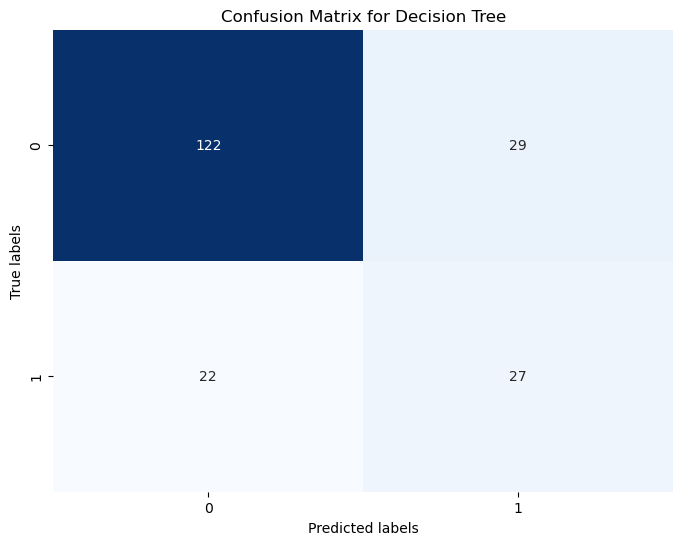

In [143]:
cm_dt_finetuned = dt_model.plot_confusion_matrix()

## Model Explanation

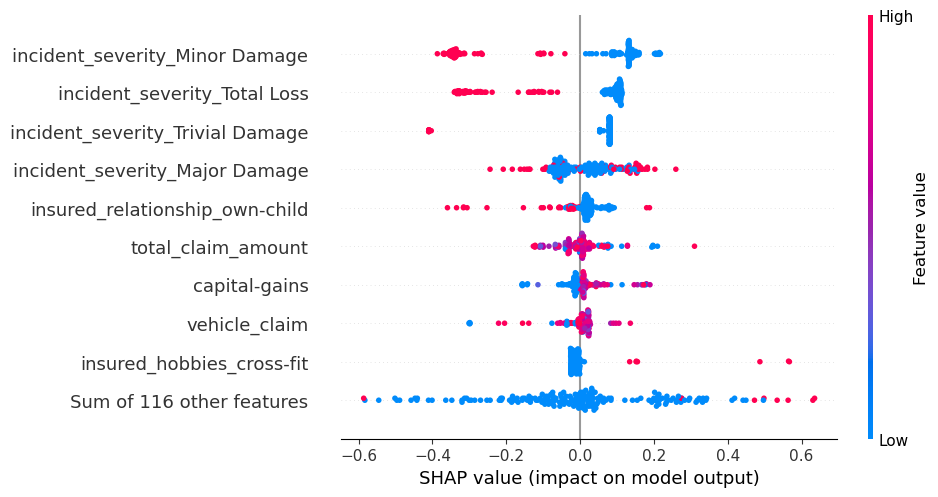

In [144]:
dt_model.shap_explanation(is_tree=True, class_to_observe=1)

[Text(0.5625, 0.9166666666666666, 'incident_severity_Major Damage <= 0.5\ngini = 0.5\nsamples = 1204\nvalue = [602, 602]\nclass = Y'),
 Text(0.33035714285714285, 0.75, 'insured_hobbies_chess <= 0.5\ngini = 0.378\nsamples = 688\nvalue = [514, 174]\nclass = Y'),
 Text(0.23214285714285715, 0.5833333333333334, 'insured_hobbies_cross-fit <= 0.5\ngini = 0.342\nsamples = 654\nvalue = [511, 143]\nclass = Y'),
 Text(0.14285714285714285, 0.4166666666666667, 'incident_severity_Minor Damage <= 0.5\ngini = 0.299\nsamples = 622\nvalue = [508, 114]\nclass = Y'),
 Text(0.07142857142857142, 0.25, 'incident_severity_Total Loss <= 0.5\ngini = 0.402\nsamples = 355\nvalue = [256, 99]\nclass = Y'),
 Text(0.03571428571428571, 0.08333333333333333, 'gini = 0.499\nsamples = 143\nvalue = [68, 75]\nclass = N'),
 Text(0.10714285714285714, 0.08333333333333333, 'gini = 0.201\nsamples = 212\nvalue = [188, 24]\nclass = Y'),
 Text(0.21428571428571427, 0.25, 'total_claim_amount <= 80348.5\ngini = 0.106\nsamples = 267\nv

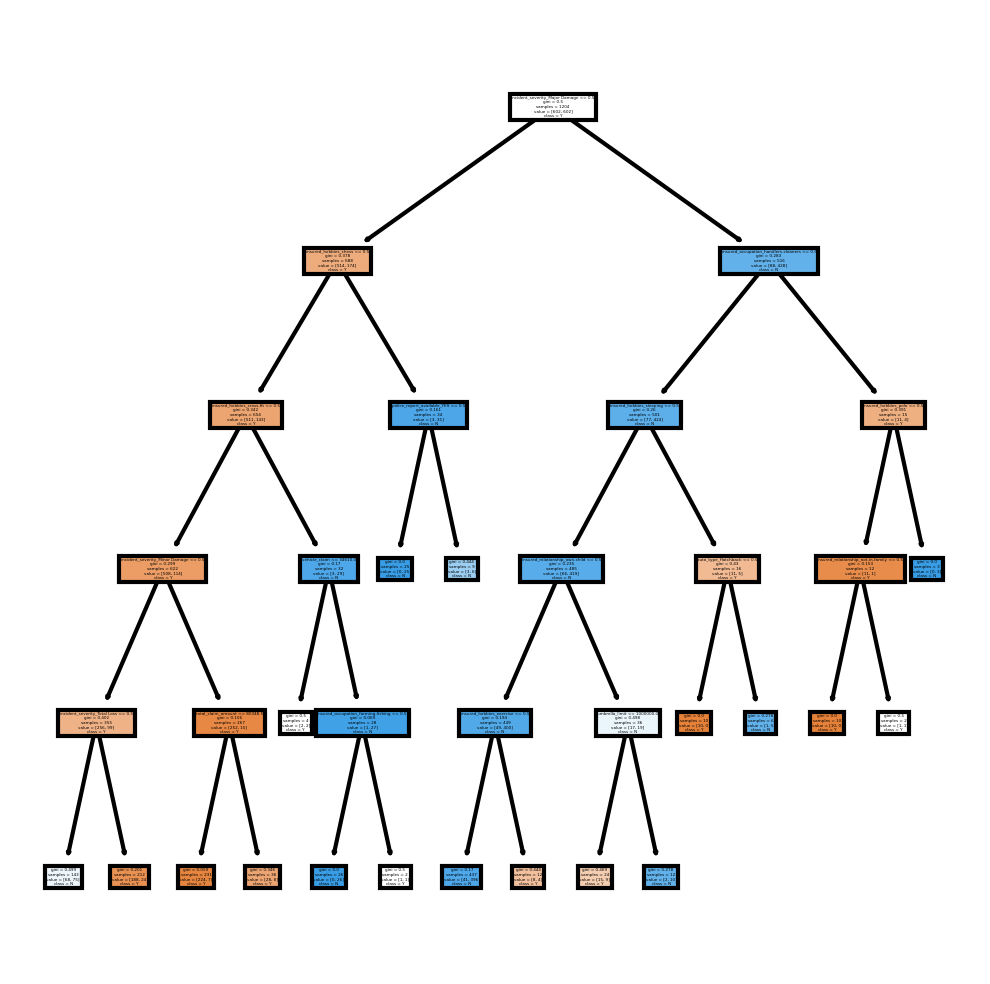

In [30]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

feature_names = list(dt_model.X_test.columns.copy())

class_names=['Y', 'N']

tree.plot_tree(dt_model.model,
               feature_names = feature_names, 
               class_names=class_names,
               filled = True)

# XGBoost

## Dataset Creation

In [7]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = preprocessing.preprocess_pipeline(
    df,
    encoding = False,
    normalization = False,
    )

In [8]:
rows_with_nan = X_train_xgb[X_train_xgb.isna().any(axis=1)]

In [9]:
# Format the data into categorical type

cate_cols = parameters.cate_cols

X_train_xgb[cate_cols] = X_train_xgb[cate_cols].astype("category")
X_test_xgb[cate_cols] = X_test_xgb[cate_cols].astype("category")

In [10]:
X_train_xgb.dtypes

months_as_customer                                 int64
age                                                int64
policy_state                                    category
policy_deductable                                  int64
policy_annual_premium                            float64
umbrella_limit                                     int64
insured_sex                                     category
insured_education_level                         category
insured_occupation                              category
insured_hobbies                                 category
insured_relationship                            category
capital-gains                                      int64
capital-loss                                       int64
incident_year                                      int64
incident_type                                   category
collision_type                                  category
incident_severity                               category
authorities_contacted          

## Model Creation

In [11]:
xgb_static_params = {
    "enable_categorical": True # Enable categorical data
}

In [12]:
from xgboost import XGBClassifier
xgb_model = models.IndividualModel(
    model_func = XGBClassifier,
    param_info = parameters.XGB_INFORMATION,
    X_train = X_train_xgb,
    X_test = X_test_xgb,
    y_train = y_train_xgb,
    y_test = y_test_xgb,
    static_params = xgb_static_params
    )

## Results with no tuning

In [13]:
xgb_model.train_predict()

xgb_model.evaluate()

ValueError: Experimental support for categorical data is not implemented for current tree method yet.

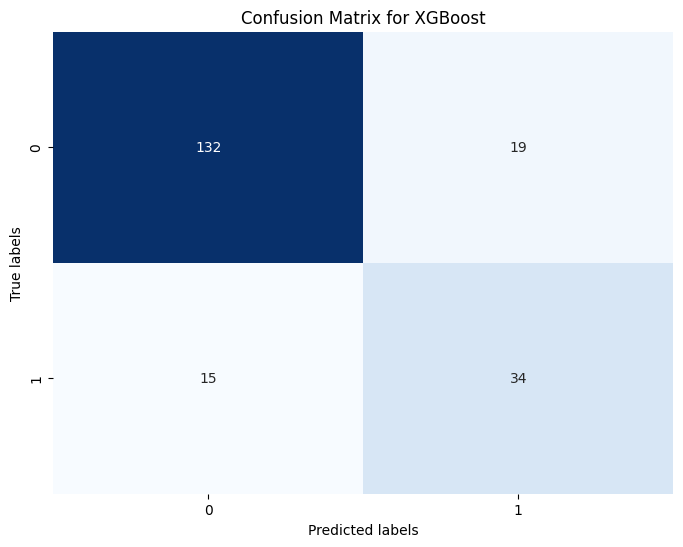

In [38]:
cm_xgb_base = xgb_model.plot_confusion_matrix()

## Results with Tuning

In [39]:
xgb_model.finetune()

[I 2024-04-06 11:23:08,312] A new study created in memory with name: no-name-44bc648c-7d8a-48ed-85ba-3783fa016f00
[I 2024-04-06 11:23:09,829] Trial 0 finished with value: 0.7350543570031653 and parameters: {'n_estimators': 146, 'max_depth': 12, 'learning_rate': 0.12, 'subsample': 0.95, 'colsample_bytree': 0.45, 'gamma': 4.2, 'reg_alpha': 1.1, 'reg_lambda': 4.3}. Best is trial 0 with value: 0.7350543570031653.
[I 2024-04-06 11:23:10,827] Trial 1 finished with value: 0.45670683558210595 and parameters: {'n_estimators': 27, 'max_depth': 31, 'learning_rate': 0.17, 'subsample': 0.8, 'colsample_bytree': 0.2, 'gamma': 3.8000000000000003, 'reg_alpha': 0.0, 'reg_lambda': 3.9000000000000004}. Best is trial 0 with value: 0.7350543570031653.
[I 2024-04-06 11:23:12,461] Trial 2 finished with value: 0.7117109557109557 and parameters: {'n_estimators': 218, 'max_depth': 33, 'learning_rate': 0.26, 'subsample': 0.9000000000000001, 'colsample_bytree': 0.7, 'gamma': 1.8, 'reg_alpha': 0.9, 'reg_lambda': 3.

(0.7585981087818224,
 {'n_estimators': 13,
  'max_depth': 3,
  'learning_rate': 0.41000000000000003,
  'subsample': 0.6000000000000001,
  'colsample_bytree': 0.5,
  'gamma': 5.0,
  'reg_alpha': 2.1,
  'reg_lambda': 3.1})

In [40]:
xgb_model.train_predict()

xgb_model.evaluate()

{'accuracy': 0.83,
 'precision': 0.6190476190476191,
 'recall': 0.7959183673469388,
 'f1_score': 0.6964285714285715}

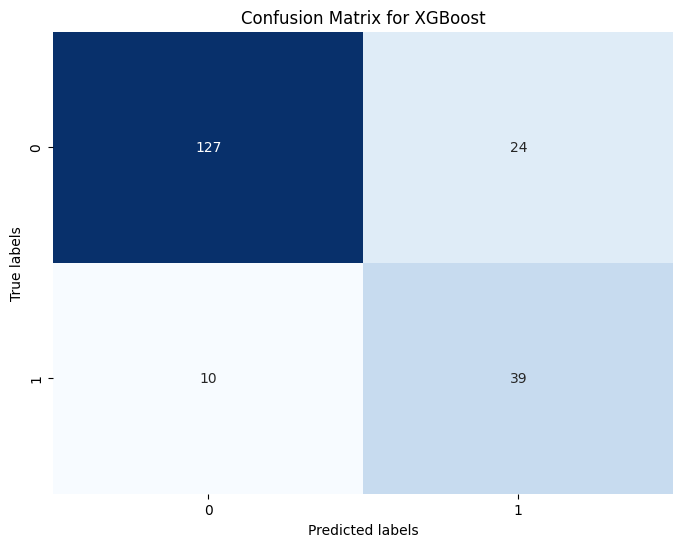

In [41]:
cm_xgb_tuned = xgb_model.plot_confusion_matrix()

## Model Explanation

### SHAP Values

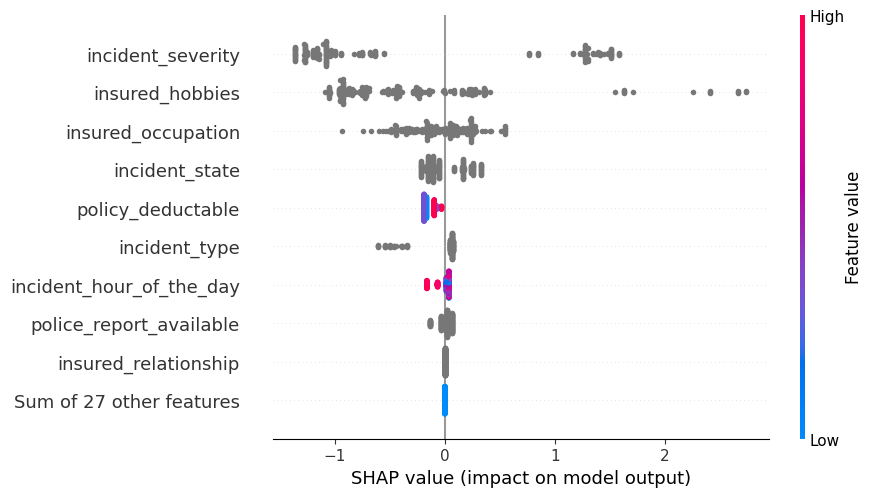

In [42]:
xgb_model.shap_explanation()

### XGBoost Native Explanation

<Axes: title={'center': 'Tuned XGBoost Feature Importance'}, xlabel='F score', ylabel='Features'>

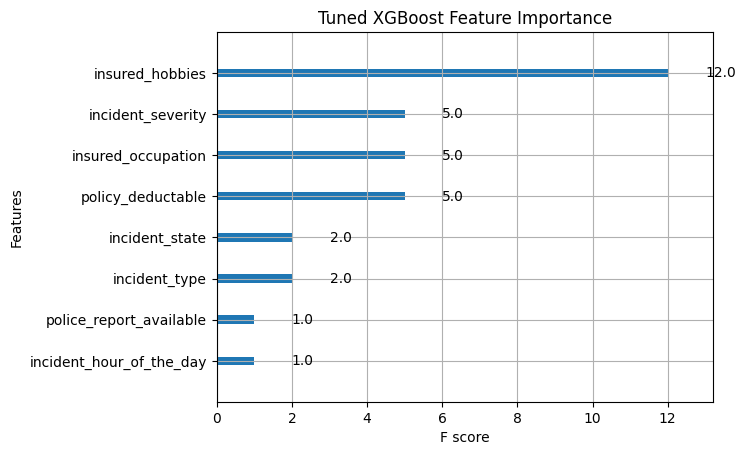

In [43]:
import xgboost as xgb

xgb.plot_importance(xgb_model.model, title="Tuned XGBoost Feature Importance")

# MLP

## Dataset creation

In [145]:
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = preprocessing.preprocess_pipeline(
    df,
    encoding = True,
    normalization = True,
    )

In [146]:
from sklearn.neural_network import MLPClassifier
mlp_static_params = {
    "random_state": 42,
    "solver": "adam" # Enable categorical data
}
mlp_model = models.IndividualModel(
    model_func=MLPClassifier,
    param_info=parameters.MLP_INFORMATION,
    X_train=X_train_mlp,
    X_test=X_test_mlp,
    y_train=y_train_mlp,
    y_test=y_test_mlp,
    static_params = mlp_static_params
)

## Baseline

In [147]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Create MLP classifier with solver='adam'
mlp_classifier = MLPClassifier(solver='adam', random_state = 42)

# Train the model
mlp_classifier.fit(X_train_mlp, y_train_mlp)

# Predict labels for the test set
y_pred = mlp_classifier.predict(X_test_mlp)

# Compute accuracy
accuracy = accuracy_score(y_test_mlp, y_pred)

# Compute precision
precision = precision_score(y_test_mlp, y_pred)

# Compute recall
recall = recall_score(y_test_mlp, y_pred)

# Compute F1-score
f1 = f1_score(y_test_mlp, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.795
Precision: 0.6428571428571429
Recall: 0.3673469387755102
F1-score: 0.4675324675324675


In [148]:
mlp_model.train_predict("RandomOverSampler")
mlp_model.evaluate()

{'accuracy': 0.27,
 'precision': 0.2512820512820513,
 'recall': 1.0,
 'f1_score': 0.4016393442622951}

In [149]:
mlp_model.finetune(oversampling_strategy = "RandomOverSampler")

[I 2024-04-07 03:23:33,996] A new study created in memory with name: no-name-947e5d87-d87b-4181-93ee-93ae62d7944c
[I 2024-04-07 03:23:35,196] Trial 0 finished with value: 0.4475306277230067 and parameters: {'hidden_layer_sizes': 180, 'alpha': 0.0096, 'learning_rate_init': 0.0091, 'max_iter': 500}. Best is trial 0 with value: 0.4475306277230067.
[I 2024-04-07 03:23:36,125] Trial 1 finished with value: 0.5501944314613338 and parameters: {'hidden_layer_sizes': 70, 'alpha': 0.0026, 'learning_rate_init': 0.0079, 'max_iter': 500}. Best is trial 1 with value: 0.5501944314613338.
[I 2024-04-07 03:23:37,128] Trial 2 finished with value: 0.44152007411370703 and parameters: {'hidden_layer_sizes': 120, 'alpha': 0.0023, 'learning_rate_init': 0.0068000000000000005, 'max_iter': 200}. Best is trial 1 with value: 0.5501944314613338.
[I 2024-04-07 03:23:38,436] Trial 3 finished with value: 0.3215589358917577 and parameters: {'hidden_layer_sizes': 170, 'alpha': 0.005900000000000001, 'learning_rate_init':

(0.6633685734183852,
 {'hidden_layer_sizes': 90,
  'alpha': 0.009899999999999999,
  'learning_rate_init': 0.0004,
  'max_iter': 400})

In [150]:
mlp_model.train_predict(oversampling_strategy = "RandomOverSampler")

mlp_model.evaluate()

{'accuracy': 0.77,
 'precision': 0.5789473684210527,
 'recall': 0.22448979591836735,
 'f1_score': 0.32352941176470584}

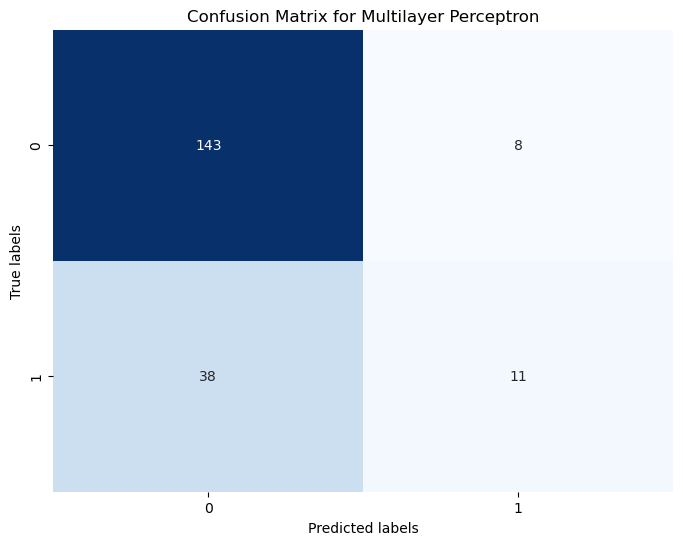

In [151]:
cm_mlp_tuned = mlp_model.plot_confusion_matrix()

In [115]:
import shap
from sklearn.model_selection import StratifiedShuffleSplit
def explain_model(model, X_test, y_test):
        # Stratified sampling
        stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=100, random_state=42)
        _, sample_indices = next(stratified_split.split(X_test, y_test))
        X_sampled = X_test.iloc[sample_indices]

        explainer = shap.Explainer(model.predict, X_sampled)
        shap_values = explainer(X_sampled)
        shap.plots.beeswarm(shap_values)

#mlp_model.shap_explanation()

In [152]:
mlp_model.shap_explanation()

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: MLPClassifier(alpha=0.009899999999999999, hidden_layer_sizes=90,
              learning_rate_init=0.0004, max_iter=400, random_state=42)

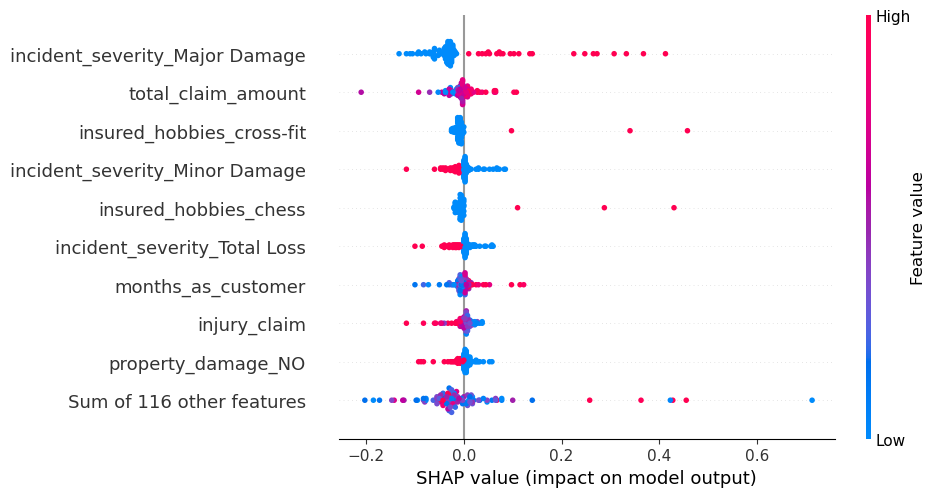

In [153]:
explain_model(mlp_model.model, mlp_model.X_test, mlp_model.y_test)